In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import URI
import seaborn as sns

In [2]:
# Creating engine with URI 
engine = create_engine(URI)
# Making connection to engine
connection = engine.connect()

# Making dataframe of salaries table from .sql
df = pd.read_sql_table("salaries",engine)
df.head()


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [3]:
# Making dataframe of employees table from .sql
employees = pd.read_sql("SELECT * FROM employees", connection)

# Merging salaries and employees tables
employee_salaries = employees.merge(df, on='emp_no')
employee_salaries.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [4]:
# Making dataframe of titles table from .sql
titles = pd.read_sql("SELECT * FROM titles", connection)
# titles.head(10)

# Merging titles and employee/salaries table
employee_title_salaries = employee_salaries.merge(titles, left_on='title_id', 
                                                  right_on='title_id')
employee_title_salaries.head() 

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


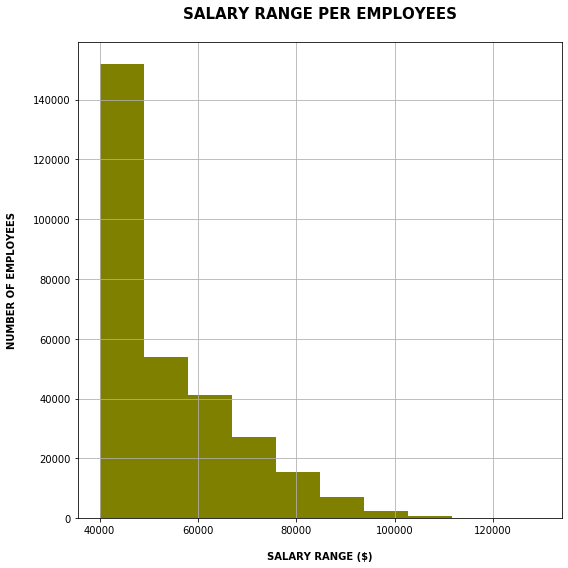

In [47]:
# Histogram visualizing most common salary ranges for employees
histogram = plt.hist(employee_title_salaries["salary"], color='olive', alpha=1)

# Sizing figure
fig = plt.gcf()
fig.set_size_inches(8,8)

# Axis labels and title
plt.xlabel("\nSALARY RANGE ($)", weight="bold");
plt.ylabel("NUMBER OF EMPLOYEES\n", weight="bold");
plt.title("SALARY RANGE PER EMPLOYEES\n", weight="bold", size=15)


# Plot details
plt.grid()
plt.tight_layout()


plt.savefig("salary_range.png")

In [10]:

salaries_and_titles= {"Salary": employee_title_salaries['salary'], "Title": employee_title_salaries['title']}
salaries_titles = pd.DataFrame(salaries_and_titles)

salaries_titles.head()

,Salary,Title
0,40000,Staff
1,40000,Staff
2,56087,Staff
3,87084,Staff
4,63016,Staff


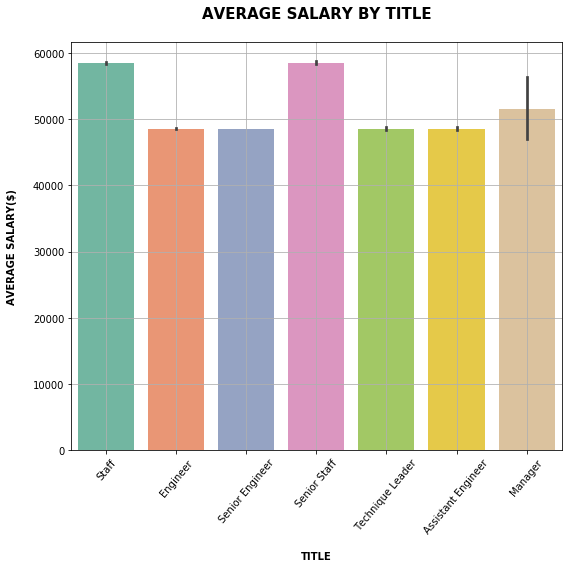

In [46]:
# Create a bar chart of average salary by title.
barplot = sns.barplot(x="Title", y="Salary", data=salaries_titles, palette='Set2')

# Sizing figure
fig = plt.gcf()
fig.set_size_inches(8,8)


plt.xlabel("\nTITLE", weight="bold")
plt.ylabel("AVERAGE SALARY($)\n", weight="bold")
plt.title("AVERAGE SALARY BY TITLE\n", weight="bold", size=15)
plt.xticks(rotation=50)
plt.grid()
plt.tight_layout()



plt.savefig("average_salary.png")


In [48]:
# Look up employee number and... 

employee_title_salaries.loc[employee_title_salaries["emp_no"] == 499942]

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000,Technique Leader
